![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Tokenización de textos  

En este taller podrán poner en práctica sus conocimientos sobre preprocesamiento de texto (tokenización). El taller está constituido por 5 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos detección de toxicidad en comentarios

En este taller se usará el conjunto de datos de detección de toxicidad en comentarios de la base de datos de Kaggle. Cada observación es un comentario que tiene como variable objetivo (target) la probabilidad de ser un comentario tóxico. El objetivo es predecir la toxicidad de cada comentario. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/c/jigsaw-unintended-bias-in-toxicity-classification/data).

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importación librerías
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LinearRegression

from sklearn import metrics
%matplotlib inline

In [3]:
# Carga de datos de archivos .csv
df = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/Toxicity.zip')
df = df[['id','comment_text', 'target']]
df.head(10)

,id,comment_text,target
0,6101457,What are you talking about? What group do Pete...,0.000000
1,5342103,"NO!, Let him, we need a Conservative government.",0.000000
2,743361,"Perhaps he took the ""power out of the Cardinal...",0.200000
3,551008,"As always, yours is dripping with sarcasm, whi...",0.000000
4,865998,The dirty little secret is that the price rang...,0.300000
5,5790966,"Light gets bent by gravity. However, it isn't...",0.000000
6,5241987,"This is a bad joke, we rewrite history every t...",0.000000
7,6116383,If some homeless actually live peacefully toge...,0.000000
8,653122,Thanks. I will.,0.166667
9,5439407,Okay.....Should we not be investigating Eric H...,0.500000


In [4]:
df= df.iloc[:20000,:]

<Axes: >

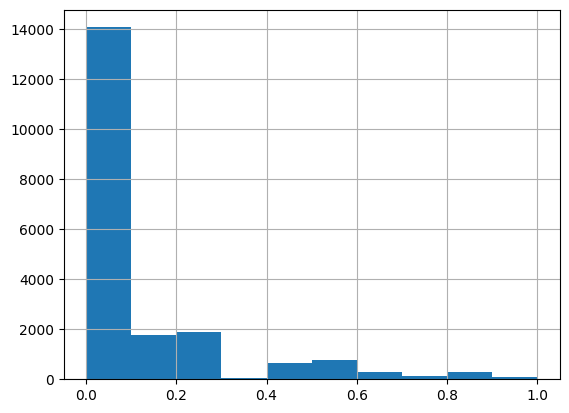

In [5]:
# Impresión histograma de variable de interés (y)
df.target.hist()

In [6]:
# Separación de variable de interés (y)
y = df.target
y.describe()

count    20000.000000
mean         0.102851
std          0.198180
min          0.000000
25%          0.000000
50%          0.000000
75%          0.166667
max          1.000000
Name: target, dtype: float64

In [7]:
# Separación de variables predictoras (X), solo se considera el texto de la noticia
X = df.comment_text

In [8]:
# Separación de datos en set de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Punto 1 - Tokenización con CountVectorizer

En la celda 1 creen y entrenen el modelo de regresión de su preferencia, para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Usen la función **CountVectorizer** para preprocesar los comentarios y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [9]:
# Creación de matrices de documentos usando CountVectorizer a partir de X
vect_V = CountVectorizer()
X_dtm_V = vect_V.fit_transform(X_train)
temp_A=X_dtm_V.todense()

In [10]:
V = vect_V.transform(X_train)
print(V.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [11]:
# Creamos el objeto de Regresión Linear
regrV = LinearRegression()

In [12]:
# Entrenamos nuestro modelo
regrV.fit(V, y_train)

LinearRegression()

In [13]:
# Hacemos las predicciones que en definitiva una línea (en este caso, al ser 2D)
yPredV = regrV.predict(V)

In [15]:
# Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente
print('Coefficients: \n', regrV.coef_)

Coefficients: 
 [ 0.06183978  0.05930974  0.16194883 ...  0.00177132 -0.01746789
 -0.01746789]


In [16]:
# Este es el valor donde corta el eje Y (en X=0)
print('Independent term: \n', regrV.intercept_)

Independent term: 
 0.019238195572316333


In [17]:
# Error Cuadrado Medio
CountVectorizer = metrics.mean_squared_error(y_train, yPredV)
print("Mean squared error:" , CountVectorizer)

Mean squared error: 8.396092617504346e-06


## Punto 2 - Tokenización con CountVectorizer y trigramas

En la celda 2 creen y entrenen el mismo modelo de regresión del punto anterior (es decir si usaron un RandomForestRegresor usen nuevamente ese regresor), para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Usen la función CountVectorizer **considerando trigramas** para preprocesar los comentarios y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [18]:
# Creación de matrices de documentos usando CountVectorizer a partir de X
vect_T = CountVectorizer(ngram_range = (3, 3))
X_dtm_T = vect_T.fit_transform(X_train)
temp_T=X_dtm_T.todense()

TypeError: ignored

In [ ]:
# Visualización de diccionario de palabras con su respectivo ID asignado
vect_T.vocabulary_

In [ ]:
T = vect_T.transform(X_train)
print(T.toarray())

In [ ]:
# Creamos el objeto de Regresión Linear
regrT = LinearRegression()

In [ ]:
# Entrenamos nuestro modelo
regrT.fit(T, y_train)

In [ ]:
# Hacemos las predicciones que en definitiva una línea (en este caso, al ser 2D)
yPredT = regrT.predict(T)

In [ ]:
# Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente
print('Coefficients: \n', regrT.coef_)

In [ ]:
# Este es el valor donde corta el eje Y (en X=0)
print('Independent term: \n', regrT.intercept_)

In [ ]:
# Error Cuadrado Medio
Trigramas = metrics.mean_squared_error(y_train, yPredT)
print("Mean squared error:" , Trigramas)

## Punto 3 - TfidfVectorizer

Investigen sobre la función TfidfVectorizer. En la celda de texto 3, expliquen en qué consiste esta técnica de tokenización (describanla y expliquen su funcionamiento) y cúales son las ventajas o deventajas de su uso al compararlo con la función CountVectorizer.

In [ ]:
#Celda 3


## Punto 4 - Tokenización con TfidfVectorizer

En la celda 4 creen y entrenen el mismo modelo de regresión del primer punto, para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Procesen los comentarios con la función **TfidfVectorizer** y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [ ]:
# Celda 4
# Creación de matrices de documentos usando CountVectorizer a partir de X
vect_Tf = TfidfVectorizer()
X_dtm_Tf = vect_Tf.fit_transform(X_train)
temp_Tf=X_dtm_Tf.todense()
#vect_Tf.fit(X_train)

In [ ]:
# Visualización de diccionario de palabras con su respectivo ID asignado
vect_Tf.vocabulary_

In [ ]:
Tf = vect_Tf.transform(X_train)
print(Tf.toarray())

In [ ]:
# Creamos el objeto de Regresión Linear
regrTf = LinearRegression()

In [ ]:
# Entrenamos nuestro modelo
regrTf.fit(Tf, y_train)

In [ ]:
# Hacemos las predicciones que en definitiva una línea (en este caso, al ser 2D)
yPredTf = regrTf.predict(Tf)

In [ ]:
# Error Cuadrado Medio
TfidfVectorizer = metrics.mean_squared_error(y_train, yPredTf)
print("Mean squared error:" , TfidfVectorizer)

## Punto 5 - Comparación y análisis de resultados

En la celda 5 comparen los resultados obtenidos de los diferentes modelos y comenten cómo el preprocesamiento de texto afecta el desempeño.